# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 993 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 54.2 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.7 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 67.4 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 57.0 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 74.8 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 71.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 74.8 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=8da01b37b73f512e58137dda98e07761bc2b233f7115b3006b2bf1263c0e32a0
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import random_split

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
transform = transforms.Compose( [ transforms.ToTensor(), transforms.Normalize( (0.5, ), (0.5, ) ) ] )

# Create training set and define training dataloader
mnist_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
totals= len(mnist_data)
print(totals, "Images Loaded")

# Create test set and define test dataloader
training_size = int(0.6* totals)
valid_size = int(0.2* totals)
test_size= int(totals - (valid_size + training_size) )

#print(training_size)

train_data, val_data, test_data = random_split( mnist_data, [training_size, valid_size, test_size] )

print(len(train_data) , "Training Set Size")
print(len(val_data) , "Validation Set Size")
print(len(test_data) , "Test Set Size")

#Started with Batch Size 128 and the moved to smaller batch size to see if it helps with model accuracy

##train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
##val_loader = DataLoader(val_data, batch_size=128)
##test_loader = DataLoader(test_data, batch_size=128)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

print(len(test_loader) , "Test Loader Size")

60000 Images Loaded
36000 Training Set Size
12000 Validation Set Size
12000 Test Set Size
375 Test Loader Size


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**Transforms:**
- Normalization was used to convert all pixels to a scale of 0 to 1. 
- The dataset is already pre-processed, centered and not rotated. 

**From Wikipedia:** 
- The black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

### Visualize Distribution Across MNIST

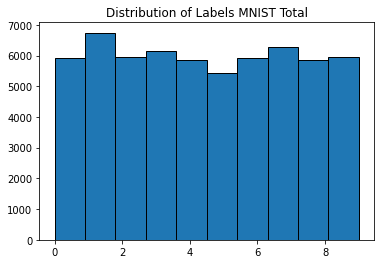

In [6]:
## MNIST Whole
mnist_data.targets
hist_prep = np.array(mnist_data.targets)
len(hist_prep)
bins = 10
frq, edges = np.histogram(hist_prep, bins)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
plt.title("Distribution of Labels MNIST Total")
plt.show()

36000


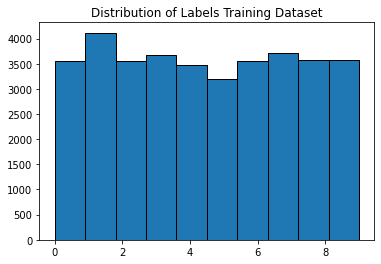

In [7]:
## Training Data Visualizayion
#train_data.targets = 'Subset' object has no attribute 'targets' ==> Did not work
#print(train_data[0])
#print(type(train_data))
#print(train_data[0][1])
trains =[]
for i in range( (len(train_data))) :
    trains.append(train_data[i][1])
hist_prep = np.array(trains)
print(len(hist_prep))
bins = 10
frq, edges = np.histogram(hist_prep, bins)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
plt.title("Distribution of Labels Training Dataset")
plt.show()

12000


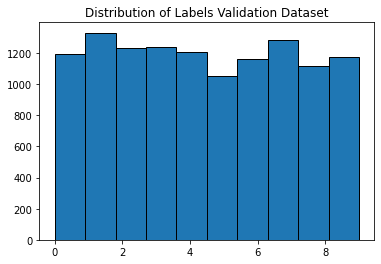

In [8]:
#Validation Data Visualization
vals =[]
for i in range( (len(val_data))) :
    vals.append(val_data[i][1])
hist_prep = np.array(vals)
print(len(hist_prep))
bins = 10
frq, edges = np.histogram(hist_prep, bins)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
plt.title("Distribution of Labels Validation Dataset")
plt.show()

12000


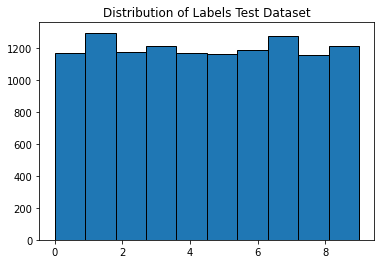

In [9]:
#Test Data Visualization
tests =[]
for i in range( (len(test_data))) :
    tests.append(test_data[i][1])
hist_prep = np.array(tests)
print(len(hist_prep))
bins = 10
frq, edges = np.histogram(hist_prep, bins)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
plt.title("Distribution of Labels Test Dataset")
plt.show()

3


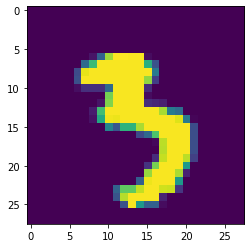

9


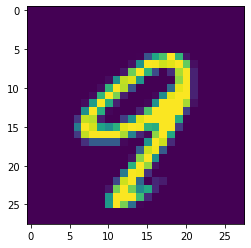

3


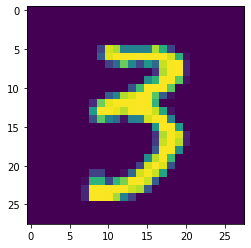

1


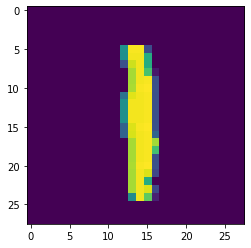

9


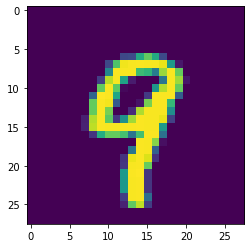

In [10]:
# Explore Training data
show5(train_loader)

0


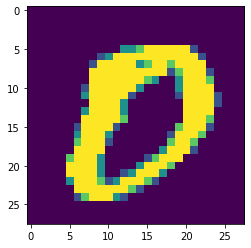

7


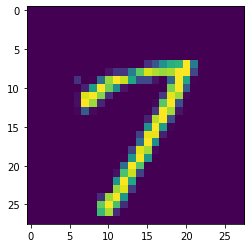

4


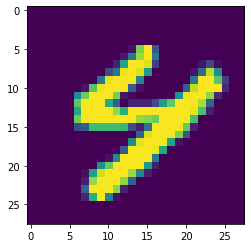

9


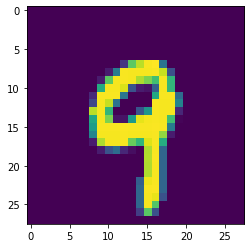

3


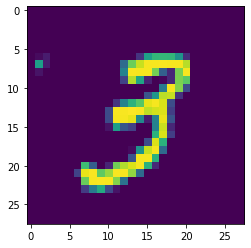

In [11]:
# Explore test data
show5(test_loader)

8


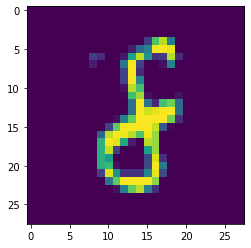

8


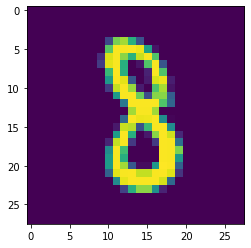

3


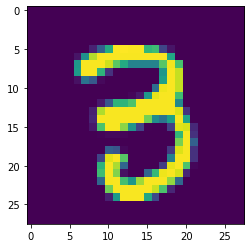

8


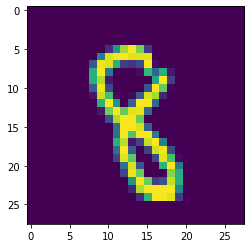

3


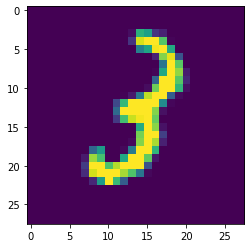

In [12]:
# Explore Val data
show5(val_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [13]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #self.dropout = nn.Dropout(p=0.5) #Experiment with a dropout
        
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28 , 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation( self.layer1(x) )
        x = self.activation( self.layer2 (x) )
        #x= self.dropout(x)
        x = self.activation( self.layer3 (x) )
        x=self.layer4(x)
        x = F.softmax(x,dim=1) #softmax for multi class outputs
        return x

# Instantiate the model and visualize
net = Net()
net.to(device)

Net(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [14]:
#Optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum  =0.9, weight_decay = 0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [15]:
##Use code from classroom learning for running the Neural Network
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 20

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 17.57% training loss: 1.93677
Epoch 1 validation accuracy: 25.94% validation loss: 1.65644
Epoch 2 training accuracy: 26.91% training loss: 1.62786
Epoch 2 validation accuracy: 28.62% validation loss: 1.57438
Epoch 3 training accuracy: 28.88% training loss: 1.56646
Epoch 3 validation accuracy: 28.71% validation loss: 1.56943
Epoch 4 training accuracy: 29.42% training loss: 1.54773
Epoch 4 validation accuracy: 29.27% validation loss: 1.55177
Epoch 5 training accuracy: 29.83% training loss: 1.53535
Epoch 5 validation accuracy: 29.73% validation loss: 1.53692
Epoch 6 training accuracy: 30.11% training loss: 1.52636
Epoch 6 validation accuracy: 29.89% validation loss: 1.53202
Epoch 7 training accuracy: 30.21% training loss: 1.52306
Epoch 7 validation accuracy: 30.10% validation loss: 1.52524
Epoch 8 training accuracy: 30.36% training loss: 1.51831
Epoch 8 validation accuracy: 30.25% validation loss: 1.52171
Epoch 9 training accuracy: 30.54% training loss: 1.51341

Plot the training loss (and validation loss/accuracy, if recorded).

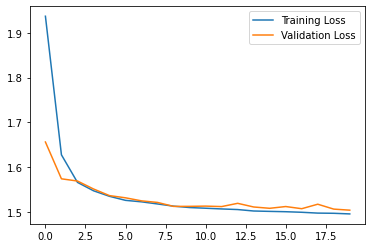

In [16]:
## Use code from classroom to visualize
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [17]:
## Accuracy caluclation ##
total_predicts = 0
correct_predicts = 0

for inputs,labels in test_loader:
    if torch.cuda.is_available:
        inputs,labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, preds = torch.max(outputs.data, 1)
    total_predicts += labels.size(0)
    correct_predicts += (preds == labels).sum().item()
    accuracy = (correct_predicts/total_predicts)*100
    print_acc = "{:.2f}".format(accuracy)

print("Accuracy is: ",print_acc , "%")

Accuracy is:  96.43 %


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [40]:
#Optimizer increased momentum and decreased learning rate
#optimizer = optim.SGD(net.parameters(), lr=0.005, momentum  =0.95, weight_decay = 0.001)
#trying a different optimizer and a lower LR
#optimizer = optim.Adam(net.parameters(), lr=0.001)
#Decided that the existing mode accuracy is better no imporvements needed.

### **Running the Model with Improvements**

In [41]:
##Use code from classroom learning for running the Neural Network.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 20

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 30.25% training loss: 1.51871
Epoch 1 validation accuracy: 30.27% validation loss: 1.51644
Epoch 2 training accuracy: 30.28% training loss: 1.51559
Epoch 2 validation accuracy: 30.17% validation loss: 1.51866
Epoch 3 training accuracy: 30.27% training loss: 1.51585
Epoch 3 validation accuracy: 30.09% validation loss: 1.52110
Epoch 4 training accuracy: 30.34% training loss: 1.51333
Epoch 4 validation accuracy: 30.05% validation loss: 1.52168
Epoch 5 training accuracy: 30.24% training loss: 1.51610
Epoch 5 validation accuracy: 30.02% validation loss: 1.52289
Epoch 6 training accuracy: 30.35% training loss: 1.51282
Epoch 6 validation accuracy: 29.96% validation loss: 1.52479
Epoch 7 training accuracy: 30.29% training loss: 1.51437
Epoch 7 validation accuracy: 30.35% validation loss: 1.51277
Epoch 8 training accuracy: 30.28% training loss: 1.51479
Epoch 8 validation accuracy: 30.10% validation loss: 1.51995
Epoch 9 training accuracy: 30.35% training loss: 1.51239

### **Visualizing the Model with Improvements**

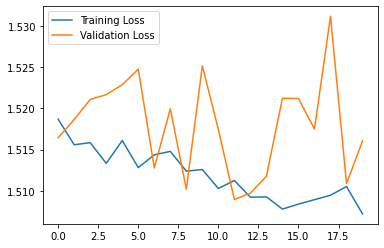

In [42]:
## Use code from classroom to visualize
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [43]:
## Accuracy caluclation ##
total_predicts = 0
correct_predicts = 0
pivot_preds =[]
pivot_labels = []
for inputs,labels in test_loader:
    if torch.cuda.is_available:
        inputs,labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, preds = torch.max(outputs.data, 1)
    total_predicts += labels.size(0)
    correct_predicts += (preds == labels).sum().item()
    #Create a list of predictions vs labels
    pivot_preds.append( preds.cpu().numpy() )
    pivot_labels.append( labels.cpu().numpy() )

#print("Length of Prediction Labels:", len(pivot_preds) )
#print("Length of Actual Labels:", len(pivot_labels) )
accuracy = (correct_predicts/total_predicts)*100
print_acc = "{:.2f}".format(accuracy)
print("Accuracy with improvements is: ", print_acc, "%")

Accuracy with improvements is:  94.19 %


## Saving your model
Using `torch.save`, save your model for future loading.

In [18]:
## YOUR CODE HERE #### Saving your model
torch.save(net.state_dict(), "first_model.pth")